Use only numpy in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015

4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

In [1]:
# 1. & 2
import numpy as np
filename = '../../data/befkbhalderstatkode.csv'
bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
dd = bef_stats_df

In [10]:
# 3. 
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
def get_number_of_people_living_in_different_areas(neighborhoods, year):
    unique_areas = np.unique(dd[:,1])
    neighb_dict = dict()
    for area in unique_areas:
        people_in_area =  dd[(dd[:, 1] == area) & (dd[:,0] == year)]
        total_people = people_in_area[:,4].sum()
        print
        neighb_dict[neighborhoods[area]] = total_people
    return neighb_dict
year = 2015
print(get_number_of_people_living_in_different_areas(neighb, year))
    

[ 1  2  3  4  5  6  7  8  9 10 99]
{'Indre By': 51937, 'Østerbro': 75113, 'Nørrebro': 78802, 'Vesterbro/Kgs. Enghave': 61623, 'Valby': 51727, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Amager Vest': 64967, 'Udenfor': 3872}


[ 1  2  3  4  5  6  7  8  9 10 99]
{'Udenfor': 3872, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Valby': 51727, 'Indre By': 51937, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Vesterbro/Kgs. Enghave': 61623, 'Amager Vest': 64967, 'Østerbro': 75113, 'Nørrebro': 78802}


Text(0.5, 1.0, 'Population data by areas')

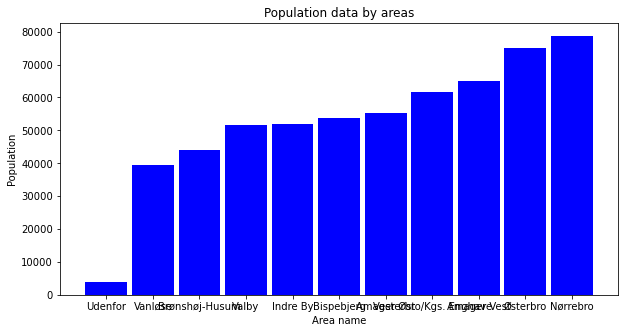

In [21]:
# 4. Make a bar plot to show the size of each city area from the smallest to the largest
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# creating the dataset
data = get_number_of_people_living_in_different_areas(neighb, year)
data_sorted = dict(sorted(data.items(), key=lambda x: x[1]))
areas = list(data_sorted.keys())
population = list(data_sorted.values())

fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(areas, population, color='blue',
        width=0.9)

plt.xlabel("Area name")
plt.ylabel("Population")
plt.title("Population data by areas")

In [28]:
# 5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
boolean_mask = (dd[:,2] > 65) & (dd[:,0] == 2015)
people_above_65 = dd[boolean_mask]
total_people_above_65 = people_above_65[:,4].sum()
print(total_people_above_65)

55750


In [29]:
# 6. How many of those were from the other nordic countries (not dk)
boolean_mask = (dd[:,2] > 65) & (dd[:,0] == 2015) & (dd[:,3] != 5100)
people_above_65 = dd[boolean_mask]
total_people_above_65 = people_above_65[:,4].sum()
print(total_people_above_65)

3451


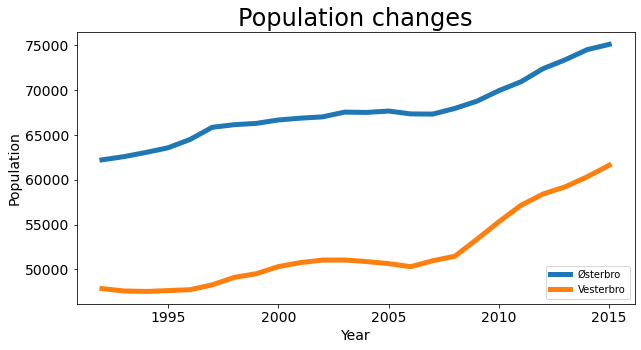

In [62]:
# 7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def get_population_changes_by_area_from_1992_to_2015(area):
    years = np.unique(dd[:,0])
    population_changes = dict()
    for year in years:
        population = dd[(dd[:,1] == area) & (dd[:,0] == year)]
        total_people = population[:,4].sum()
        population_changes[year] = total_people
    return population_changes
østerbro = get_population_changes_by_area_from_1992_to_2015(2)
vesterbro = get_population_changes_by_area_from_1992_to_2015(4)

plt.figure(figsize=(10, 5))
p1, = plt.plot(list(østerbro.keys()), list(østerbro.values()), linewidth=5)
p2, = plt.plot(list(vesterbro.keys()), list(vesterbro.values()), linewidth=5)
# Set chart title and label axes. 
plt.title("Population changes", fontsize=24)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Population", fontsize=14)
# Set size of tick labels.
plt.tick_params(axis='both', labelsize=14)

plt.legend([p1, p2], ["Østerbro", "Vesterbro"], loc=4)
